<a href="https://colab.research.google.com/github/bhushanp9/Deep_Learning_Projectss/blob/main/sentiment_analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
import kagglehub

path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
print("PAth to dataset files:" ,path)

PAth to dataset files: /kaggle/input/amazon-fine-food-reviews


In [6]:
df = pd.read_csv(f'{path}/Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [7]:
df = df.head(2000)

In [8]:
len(df)

2000

In [9]:
from transformers import pipeline

In [10]:
pipe = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


<Axes: title={'center': 'Count of reviews by Stars'}, xlabel='Score'>

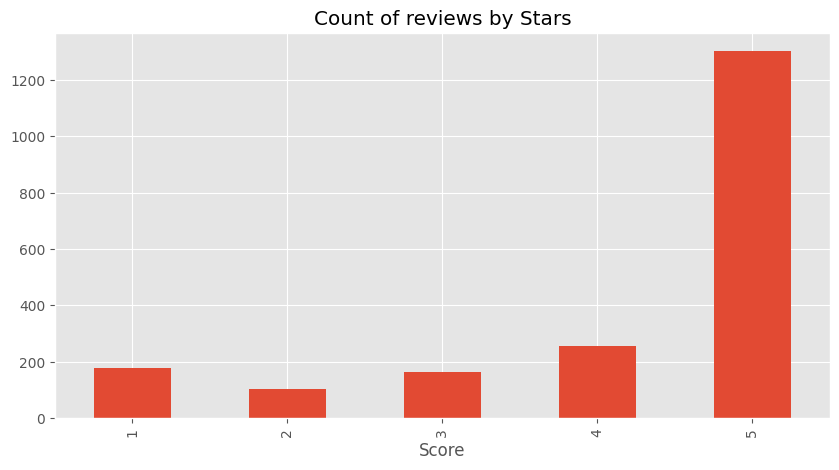

In [11]:
df['Score'].value_counts().sort_index().plot(kind="bar",title="Count of reviews by Stars", figsize=(10,5))

In [15]:
example =  df['Text'][50]


In [16]:

tokens = nltk.word_tokenize(example)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [17]:
tagged =  nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [18]:
entities =  nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [19]:
#VADER (BOW)

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [20]:
sia = SentimentIntensityAnalyzer()

In [21]:
sia.polarity_scores("our student was fully recovered few weeks ago he's happy now")

{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}

In [22]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [23]:
res = {}
for i ,row in tqdm(df.iterrows(),total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
1996,0.000,0.754,0.246,0.9744
1997,0.025,0.744,0.231,0.9978
1998,0.000,0.719,0.281,0.9501
1999,0.053,0.839,0.108,0.7003


In [25]:
vaders = vaders.reset_index().rename(columns={"index":'Id'})

In [26]:
vaders =  vaders.merge(df)

In [27]:
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0.000,0.754,0.246,0.9744,B001E5E29A,A3IJNH61DY5N9K,Sharon Allan,10,11,5,1265846400,Great Waffles for us non-cooks,I have to laugh at the reviews that said it wa...
1996,1997,0.025,0.744,0.231,0.9978,B001E5E29A,A35W3JQYP0M655,"Ambergris ""John Thomas""",7,7,5,1279929600,Excellent Fluffy Pancakes.....,I had read some favorable reviews of this panc...
1997,1998,0.000,0.719,0.281,0.9501,B001E5E29A,A3CLWZGMC7M9Z1,"Hippie2MARS ""Hippie2MARS""",6,6,4,1250640000,Good Basic Mix,I was expecting great things based on the revi...
1998,1999,0.053,0.839,0.108,0.7003,B001E5E29A,A2V6P1FKRHCVQQ,S. Jackson,8,9,4,1265760000,"Good pancakes, lots of work",I love this pancake mix. I bought my first ca...


In [28]:
len(vaders[vaders['compound']< 0.6])

511

<Axes: xlabel='Score', ylabel='compound'>

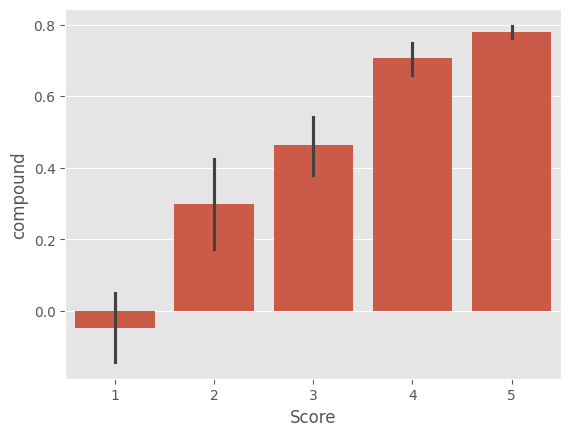

In [29]:
sns.barplot(data=vaders, x = "Score", y = "compound")

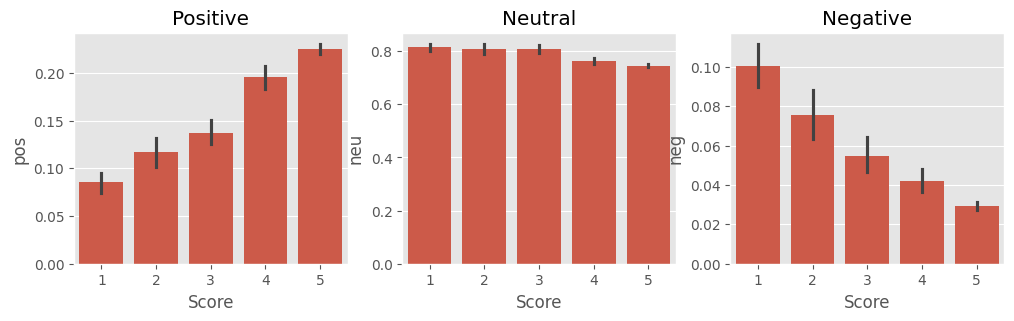

In [30]:
fig , axs = plt.subplots(1,3,figsize = (12,3))

sns.barplot(data=vaders, x = "Score", y = "pos" , ax = axs[0])
sns.barplot(data=vaders, x = "Score", y = "neu",  ax = axs[1])
sns.barplot(data=vaders, x = "Score", y = "neg",  ax = axs[2])


axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")

plt.show()

In [31]:
pipe("our student was lost his job")

[{'label': 'NEGATIVE', 'score': 0.9997586607933044}]